<a href="https://colab.research.google.com/github/yeJinni/DA/blob/main/02_Cleanser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel('/Data05.xlsx')
df1

,Unnamed: 0,0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,정상,정상.1,정상.2,정상.3,부진,부진.1,부진.2,부진.3,불용,불용.1,불용.2,불용.3,합계,합계.1,합계.2,합계.3,Unnamed: 25,
0,구분,0,카테고리명,자재그룹,자재그룹명,제품코드,제품명,NaN,판매,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,안전재고,분류
1,구분,501,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,천원,0,0,0,0,0,0,0,0,0,98.8,0,0,0,98.8,0,0,0,0,E
2,구분,501,SSA,6132,청렴세제 오리지널,6073719,18청렴세제 1.5KG카툰,천원,0,0,0,0,0,0,0,0,0,393.7,0,0,0,393.7,0,0,0,0,E
3,구분,501,SSA,6132,청렴세제 오리지널,6075268,19청렴세제드럼 2.5KG리필,천원,10354.1,9474.3,9741.7,6965.7,3368.2,0,0,0,0,6.4,0,6.4,0,9480.7,9741.7,6972,3368.2,0,A
4,구분,501,SSA,6132,청렴세제 오리지널,6075269,19청렴세제드럼 2.8KG카톤,천원,3543.3,7702.6,6117.1,4009.9,2669.8,0,0,0,0,7.7,10.2,0,10.2,7710.3,6127.3,4009.9,2680.1,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,구분,501,SSA,6132,청렴세제 오리지널,6067001,18 청렴세제5.5KG 리필,천원,0,0,0,0,0,0,0,0,0,963.4,0,0,0,963.4,0,0,0,0,E
90,구분,501,SSA,6132,청렴세제 오리지널,6067002,18 청렴세제 6KG 리필,천원,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,0,E
91,구분,501,SSA,6132,청렴세제 오리지널,6067004,18청렴세제 3.2KG 리필(온라인),천원,0,0,0,0,0,0,0,0,0,6.5,0,0,0,6.5,0,0,0,0,E
92,구분,501,SSA,6132,청렴세제 오리지널,6067005,18 청렴세제 10KG 리필,천원,0,0,0,0,0,243.8,0,0,0,609.5,0,0,0,853.4,0,0,0,0,E


In [ ]:
df1 = pd.read_excel('/Data05.xlsx', skiprows=1) #필요없는 첫 줄 삭제하고 출력

In [ ]:
df1.shape #데이터 행,열 파악

(93, 27)

In [ ]:
df1.columns #데이터구조(컬럼) 확인
#Unnamed만 빼서 날짜컬럼으로 묶을 것임

Index([ 'Unnamed: 0',             0,  'Unnamed: 2',  'Unnamed: 3',
        'Unnamed: 4',  'Unnamed: 5',  'Unnamed: 6',  'Unnamed: 7',
        'Unnamed: 8',          '정상',        '정상.1',        '정상.2',
              '정상.3',          '부진',        '부진.1',        '부진.2',
              '부진.3',          '불용',        '불용.1',        '불용.2',
              '불용.3',          '합계',        '합계.1',        '합계.2',
              '합계.3', 'Unnamed: 25',           ' '],
      dtype='object')

In [ ]:
#df1.iloc[:,0] #전체(:) 행,0 열 출력
df1.iloc[:,8:-2] #전체 행, 8~뒤에서 2번째 열까지 출력

,판매,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2019-12-01 00:00:00.1,2020-10-01 00:00:00.1,2020-11-01 00:00:00.1,2020-12-01 00:00:00.1,2019-12-01 00:00:00.2,2020-10-01 00:00:00.2,2020-11-01 00:00:00.2,2020-12-01 00:00:00.2,2019-12-01 00:00:00.3,2020-10-01 00:00:00.3,2020-11-01 00:00:00.3,2020-12-01 00:00:00.3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.8,0.0,0.0,0.0,98.8,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393.7,0.0,0.0,0.0,393.7,0.0,0.0,0.0
2,10354.1,9474.3,9741.7,6965.7,3368.2,0.0,0.0,0.0,0.0,6.4,0.0,6.4,0.0,9480.7,9741.7,6972.0,3368.2
3,3543.3,7702.6,6117.1,4009.9,2669.8,0.0,0.0,0.0,0.0,7.7,10.2,0.0,10.2,7710.3,6127.3,4009.9,2680.1
4,234603.9,56309.6,78268.0,74942.2,84690.1,0.0,0.0,0.0,0.0,293.0,0.0,0.0,277.2,56602.6,78268.0,74942.2,84967.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,963.4,0.0,0.0,0.0,963.4,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,6.5,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,243.8,0.0,0.0,0.0,609.5,0.0,0.0,0.0,853.4,0.0,0.0,0.0


In [ ]:
df1.iloc[:,8:-2].T # .T는 행<->렬 교차됨

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
Unnamed: 8,판매,0,0,10354.1,3543.3,234604,3339.9,2616.8,16520.3,11722.5,100526,70159.2,6460.5,8893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16402.2,0,2146.2,4026.4,291.3,0,25320.8,2986.7,5012.4,585,0,16636.2,...,0,5317.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-28.7,0,0,0,0,0,181332
정상,2019-12-01 00:00:00,0,0,9474.3,7702.6,56309.6,3181.8,24351.4,26129.3,26550.6,17334.1,32350.2,5862.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18230.3,0,519.5,9740.3,0,0,47153.2,0,9670.2,8037.4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40207.8
정상.1,2020-10-01 00:00:00,0,0,9741.7,6117.1,78268,7674,19767.5,35423.7,4279.6,32889.1,34120.6,17820.9,287.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38921.6,0,1178.4,12012.8,0,44.7,43437,11964.2,6347.5,3983.1,0,19386.7,...,0,18263.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107176
정상.2,2020-11-01 00:00:00,0,0,6965.7,4009.9,74942.2,3710.2,18616.7,26476.3,15773.6,16821.8,5633.1,11808.6,5150.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27939.4,0,120.4,9481.9,0,0,17273.7,8067.8,5342.4,3587.2,0,17583.9,...,0,12952.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110209
정상.3,2020-12-01 00:00:00,0,0,3368.2,2669.8,84690.1,8294.9,17021.1,60737,8400.1,29712.9,21007.8,7444.4,26497.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33949.7,0,11606.3,7459,0,0,31928.8,6418.2,1619.5,3191.2,0,16845.8,...,0,10011.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43576.6
부진,2019-12-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,0,0,0,0,0,716.2,354.1,0,340.3,0,0,0,10275.4,0,0,9198.8,0,0,0,0,0,0,0,...,4080.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243.8,0
부진.1,2020-10-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,12173.8,0,0,0,0,0,406.4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
부진.2,2020-11-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,172.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
부진.3,2020-12-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
불용,2019-12-01 00:00:00,98.8,393.7,6.4,7.7,293,0,0,112.5,36.1,298.1,483.4,98.8,14,46.9,1694.1,32.3,222.7,258.2,172.7,31.8,19,27.7,44.3,99.9,213.9,82.7,4.4,42.7,6.7,0,8.9,0,0,27.3,0,0,0,0,0,...,0,0,10.1,3.4,38.1,112,214.7,40,4.1,7.6,34,9.2,5,1144.5,146.1,64.2,3.6,20,46.9,110.7,298.6,986,26,9.6,21.2,1.2,8.2,2.9,16.9,583.6,14.7,1.6,47.1,7.8,64.3,963.4,3,6.5,609.5,1249.7


In [ ]:
df2 = df1.iloc[:,8:-2]

In [ ]:
df2.stack() #숫자데이터들을 컬럼(0,1,2,..) 별 일렬로 쌓아준다.

0   판매                            0.0
    2019-12-01 00:00:00           0.0
    2020-10-01 00:00:00           0.0
    2020-11-01 00:00:00           0.0
    2020-12-01 00:00:00           0.0
                               ...   
92  2020-12-01 00:00:00.2       425.6
    2019-12-01 00:00:00.3     41457.5
    2020-10-01 00:00:00.3    107175.6
    2020-11-01 00:00:00.3    110209.3
    2020-12-01 00:00:00.3     44002.2
Length: 1581, dtype: float64

In [ ]:
#pd.DataFrame(df2.stack()) #데이터프레임형태로 출력
#pd.DataFrame(df2.stack()).reset_index() #모든 항목에 번호 붙여 출력
pd.DataFrame(df2.stack()).reset_index().iloc[1:] #1행 아래범위 출력

In [ ]:
#df3
df3.set_index(['제품명']) #'제품명'컬럼을 인덱스로 지정!! -> stack()처리하면 제품명 중복되지 않게 된다.

In [ ]:
#df3.set_index(['제품명']).stack()
df4 = pd.DataFrame(df3.set_index(['제품명']).stack()).reset_index() #날짜가 key값인 재고현황 표 완성,
df4.head()

,제품명,level_1,0
0,18청렴세제 리필4KG(GS리테일마,2019-12-01 00:00:00.000,0.0
1,18청렴세제 리필4KG(GS리테일마,2020-10-01 00:00:00.000,0.0
2,18청렴세제 리필4KG(GS리테일마,2020-11-01 00:00:00.000,0.0
3,18청렴세제 리필4KG(GS리테일마,2020-12-01 00:00:00.000,0.0
4,18청렴세제 리필4KG(GS리테일마,2019-12-01 00:00:00.100,0.0


In [ ]:
#컬럼명 변경 rename(columns={A:B}) A에서 B로 변경하겠다는 의미
df5 = df4.rename(columns={'level_1':'날짜',0:'재고량'} )

In [ ]:
#완성한 df4를 원래 기준표 df1에 붙이기
df1.head(2)

In [ ]:
#df1.columns
#선택 컬럼만 출력
df6 = df1[['카테고리명','자재그룹','자재그룹명','제품코드','제품명','안전재고',' 분류']]

*Table Join
  -right / left
  -inner
  -outer

In [ ]:
#제품명을 기준으로 df5와 df6 병합
#'제품명'컬럼 기준으로 df5에 df6을 붙임.
df7 = pd.merge(df6, df5, how='right', on='제품명')
df7.to_excel('total_data.xlsx')
df7

,카테고리명,자재그룹,자재그룹명,제품코드,제품명,안전재고,분류,날짜,재고량
0,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2019-12-01 00:00:00.000,0.0
1,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-10-01 00:00:00.000,0.0
2,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-11-01 00:00:00.000,0.0
3,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-12-01 00:00:00.000,0.0
4,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2019-12-01 00:00:00.100,0.0
...,...,...,...,...,...,...,...,...,...
1483,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-12-01 00:00:00.200,425.6
1484,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2019-12-01 00:00:00.300,41457.5
1485,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-10-01 00:00:00.300,107175.6
1486,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-11-01 00:00:00.300,110209.3


In [ ]:
df7['날짜(전처리)'] = pd.to_datetime(df7['날짜'])
df7

,카테고리명,자재그룹,자재그룹명,제품코드,제품명,안전재고,분류,날짜,재고량,날짜(전처리),공급월,날짜(예진)
0,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2019-12-01 00:00:00.000,0.0,2019-12-01 00:00:00.000,12,2019-12-01 00:00:00.000
1,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-10-01 00:00:00.000,0.0,2020-10-01 00:00:00.000,10,2020-10-01 00:00:00.000
2,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-11-01 00:00:00.000,0.0,2020-11-01 00:00:00.000,11,2020-11-01 00:00:00.000
3,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-12-01 00:00:00.000,0.0,2020-12-01 00:00:00.000,12,2020-12-01 00:00:00.000
4,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2019-12-01 00:00:00.100,0.0,2019-12-01 00:00:00.100,12,2019-12-01 00:00:00.100
...,...,...,...,...,...,...,...,...,...,...,...,...
1483,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-12-01 00:00:00.200,425.6,2020-12-01 00:00:00.200,12,2020-12-01 00:00:00.200
1484,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2019-12-01 00:00:00.300,41457.5,2019-12-01 00:00:00.300,12,2019-12-01 00:00:00.300
1485,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-10-01 00:00:00.300,107175.6,2020-10-01 00:00:00.300,10,2020-10-01 00:00:00.300
1486,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-11-01 00:00:00.300,110209.3,2020-11-01 00:00:00.300,11,2020-11-01 00:00:00.300


In [ ]:
df7['공급월'] = df7['날짜(전처리)'].dt.month
df7

,카테고리명,자재그룹,자재그룹명,제품코드,제품명,안전재고,분류,날짜,재고량,날짜(전처리),공급월,날짜(예진)
0,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2019-12-01 00:00:00.000,0.0,2019-12-01 00:00:00.000,12,2019-12-01 00:00:00.000
1,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-10-01 00:00:00.000,0.0,2020-10-01 00:00:00.000,10,2020-10-01 00:00:00.000
2,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-11-01 00:00:00.000,0.0,2020-11-01 00:00:00.000,11,2020-11-01 00:00:00.000
3,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2020-12-01 00:00:00.000,0.0,2020-12-01 00:00:00.000,12,2020-12-01 00:00:00.000
4,SSA,6132,청렴세제 오리지널,6068068,18청렴세제 리필4KG(GS리테일마,0.0,E,2019-12-01 00:00:00.100,0.0,2019-12-01 00:00:00.100,12,2019-12-01 00:00:00.100
...,...,...,...,...,...,...,...,...,...,...,...,...
1483,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-12-01 00:00:00.200,425.6,2020-12-01 00:00:00.200,12,2020-12-01 00:00:00.200
1484,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2019-12-01 00:00:00.300,41457.5,2019-12-01 00:00:00.300,12,2019-12-01 00:00:00.300
1485,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-10-01 00:00:00.300,107175.6,2020-10-01 00:00:00.300,10,2020-10-01 00:00:00.300
1486,SSA,6132,청렴세제 오리지널,6067006,18청렴세제 9.5KG 리필(온라인),0.0,M,2020-11-01 00:00:00.300,110209.3,2020-11-01 00:00:00.300,11,2020-11-01 00:00:00.300


In [ ]:
pd.pivot_table(data=df7, index='공급월', values='재고량',aggfunc='sum')
#pd.pivot_table(data=df7, index='공급월', values='재고량',aggfunc='sum').to_excel('result1.xlsx')
#pd는 마법의 주문 판다스
#data출처= df7, index=공급월, 값=재고량, 표현방법=합

,재고량
공급월,
10,1396891.0
11,1085014.7
12,2152915.2


In [ ]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic') #고딕체 설정일 뿐

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

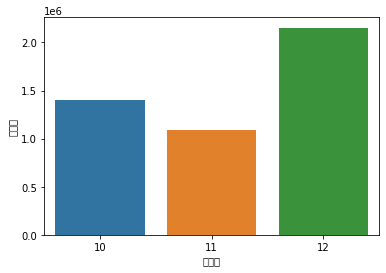

In [ ]:
sns.barplot(data=df7, x='공급월', y='재고량', ci = None, estimator=sum)
plt.savefig('img_result1.png')